<a href="https://colab.research.google.com/github/monikak2004/-Top-Instagram-Influencers-Data-/blob/main/Top-Influerncer-Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving top_insta_influencers_data.csv to top_insta_influencers_data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('top_insta_influencers_data.csv')  # Ensure this matches the uploaded filename
df.head()
df.columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rank               200 non-null    int64 
 1   channel_info       200 non-null    object
 2   influence_score    200 non-null    int64 
 3   posts              200 non-null    object
 4   followers          200 non-null    object
 5   avg_likes          200 non-null    object
 6   60_day_eng_rate    200 non-null    object
 7   new_post_avg_like  200 non-null    object
 8   total_likes        200 non-null    object
 9   country            138 non-null    object
dtypes: int64(2), object(8)
memory usage: 15.8+ KB


In [8]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Drop rows with missing key values
df.dropna(subset=['followers', '60_day_eng_rate'], inplace=True)

# Convert followers to numeric
def convert_followers(val):
    if isinstance(val, str):
        val = val.replace(',', '').strip().lower()
        try:
            if 'k' in val:
                return float(val.replace('k', '')) * 1e3
            elif 'm' in val:
                return float(val.replace('m', '')) * 1e6
            elif 'b' in val:
                return float(val.replace('b', '')) * 1e9
            else:
                return float(val)
        except:
            return np.nan
    return val

df['followers'] = df['followers'].apply(convert_followers)

# Convert engagement rate to numeric
df['60_day_eng_rate'] = df['60_day_eng_rate'].astype(str).str.replace('%', '')
df['60_day_eng_rate'] = pd.to_numeric(df['60_day_eng_rate'], errors='coerce')

# Final drop of bad rows
df.dropna(subset=['followers', '60_day_eng_rate'], inplace=True)


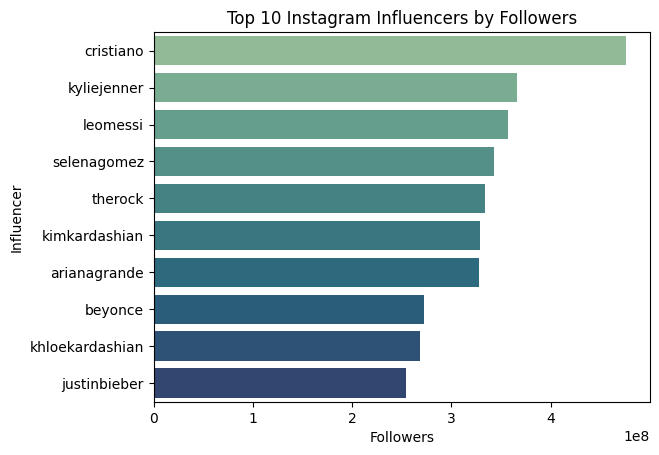

In [9]:
top10 = df.sort_values(by='followers', ascending=False).head(10)
sns.barplot(x='followers', y='channel_info', data=top10, palette='crest')
plt.title('Top 10 Instagram Influencers by Followers')
plt.xlabel('Followers')
plt.ylabel('Influencer')
plt.show()


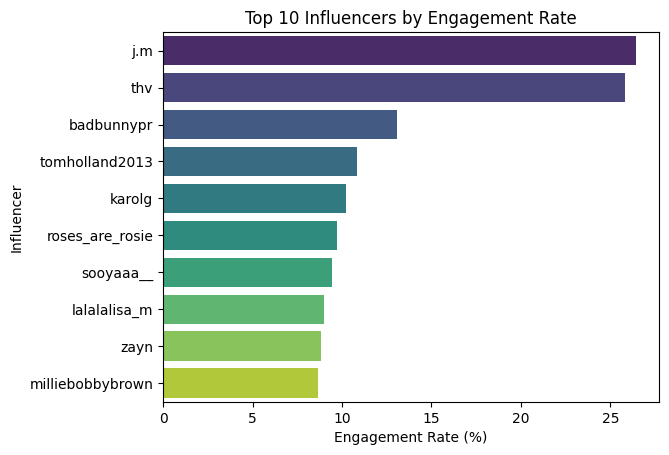

In [10]:
top_engagement = df.sort_values(by='60_day_eng_rate', ascending=False).head(10)
sns.barplot(x='60_day_eng_rate', y='channel_info', data=top_engagement, palette='viridis')
plt.title('Top 10 Influencers by Engagement Rate')
plt.xlabel('Engagement Rate (%)')
plt.ylabel('Influencer')
plt.show()


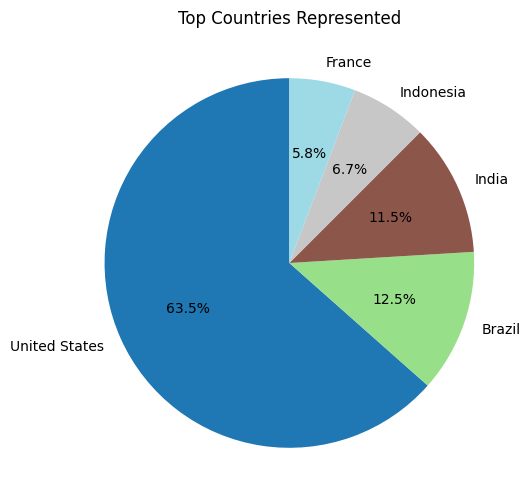

In [11]:
top_countries = df['country'].value_counts().head(5)
top_countries.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(6,6), colormap='tab20')
plt.title('Top Countries Represented')
plt.ylabel('')
plt.show()


In [12]:
if 'category' in df.columns:
    text = ' '.join(df['category'].astype(str))
    wordcloud = WordCloud(background_color='white', width=800, height=400).generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Categories')
    plt.show()


## Summary & Insights

- The most-followed influencers exceed 400 million followers.
- Engagement rate varies significantly, with some niche influencers outperforming celebrities.
- The top influencer categories include lifestyle, fashion, and entertainment.
- USA, India, and Brazil dominate influencer distribution.
- WordCloud shows frequent trends in content themes and categories.
